In [1]:
import glob
import xarray as xr
import netCDF4
import h5netcdf
import scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
# Please use WGET on our online data to download the data - this is from a server 
sst=xr.open_mfdataset('/glade/work/jrotondo/MLGEO2024_SeaIcePrediction/data/clean/sst_1979_2023_clean.nc', combine='by_coords') # Pulling in SST data - note elrady ai ready
sic=xr.open_mfdataset('/glade/derecho/scratch/geraint/MLFINALPROJDATA/ai_ready/ready_nh_sept_sic_19792023.nc', combine='by_coords').monthly_sic # Pulling in SIC data

In [3]:
sst

<xarray.Dataset>
Dimensions:    (date: 540, latitude: 161, longitude: 1440)
Coordinates:
    number     int64 ...
  * date       (date) int64 19790101 19790201 19790301 ... 20231101 20231201
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... 50.5 50.25 50.0
  * longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    expver     (date) object dask.array<chunksize=(540,), meta=np.ndarray>
Data variables:
    sst        (date, latitude, longitude) float32 dask.array<chunksize=(540, 161, 1440), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-21T22:06 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
sic

<xarray.DataArray 'monthly_sic' (time: 45, lat: 161, lon: 1440)>
dask.array<open_dataset-monthly_sic, shape=(45, 161, 1440), dtype=float64, chunksize=(45, 161, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-09-01 1980-09-01 ... 2023-09-01
  * lon      (lon) float64 -180.0 -179.7 -179.5 -179.2 ... 179.5 179.7 180.0
  * lat      (lat) float64 50.0 50.25 50.5 50.75 51.0 ... 89.25 89.5 89.75 90.0
Attributes:
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    standard_name:        sea_ice_area_fraction
    units:                1
    flag_values:          [251 252 253 254 255]
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    grid_mapping:         projection
    reference:            https://nsidc.org/data/g02202/versions/4/
    ancillary_variables:  stdev_of_cdr_seaice_conc_monthly qa_of_cdr_seaice_c...
    valid_range:          [  0 100]
    coordinates:          time ygrid xgrid

In [29]:
sst_september = sst.sel(date=sst.date.astype(str).str[4:6] == '09')
sst_september

<xarray.Dataset>
Dimensions:    (date: 45, latitude: 161, longitude: 1440)
Coordinates:
    number     int64 ...
  * date       (date) int64 19790901 19800901 19810901 ... 20220901 20230901
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... 50.5 50.25 50.0
  * longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    expver     (date) object dask.array<chunksize=(45,), meta=np.ndarray>
Data variables:
    sst        (date, latitude, longitude) float32 dask.array<chunksize=(45, 161, 1440), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-21T22:06 GRIB to CDM+CF via cfgrib-0.9.1...

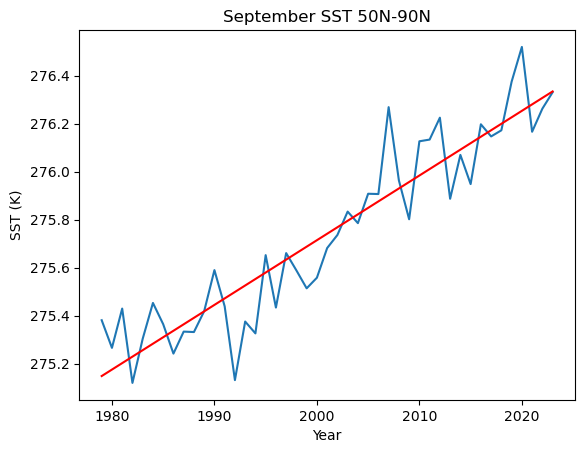

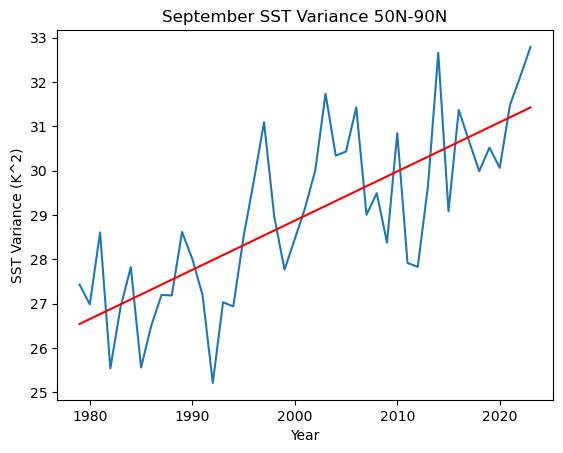

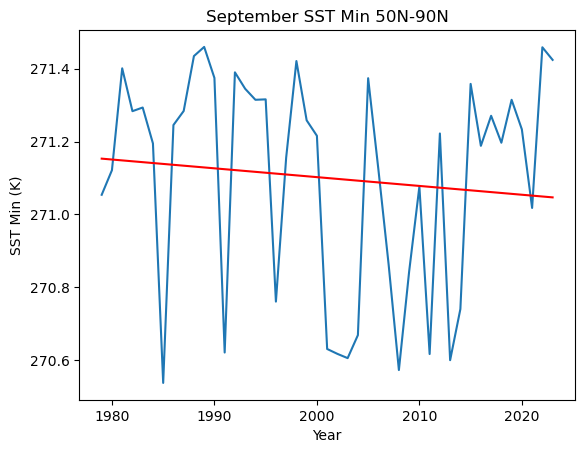

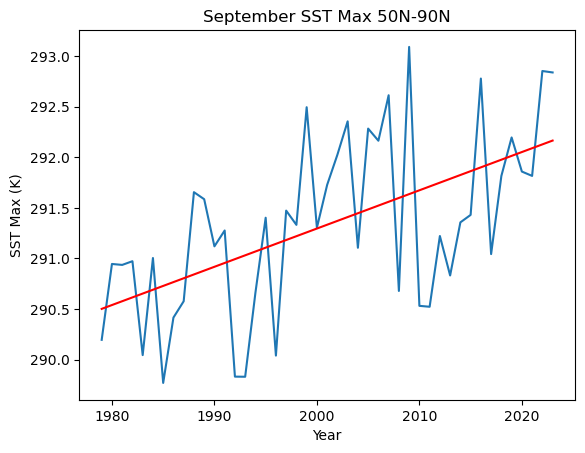

In [43]:
# Monthly meana values in K
sst_monthly_mean = sst_september.sst.mean(dim=['latitude', 'longitude'])
sst_monthly_mean.values
plt.plot(np.arange(1979,2023+1,1), sst_monthly_mean.values)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979,2023+1,1), sst_monthly_mean.values)
plt.plot(np.arange(1979,2023+1,1), slope*np.arange(1979,2023+1,1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SST (K)')
plt.title('September SST 50N-90N')
plt.show()
# Caluclate the varience of the SST in this dataset - caluclate the varience of the SST in this dataset across the domain
sst_sept_var=sst_september.sst.var(dim=['latitude', 'longitude']).values
plt.plot(np.arange(1979,2023+1,1), sst_sept_var)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979,2023+1,1), sst_sept_var)
plt.plot(np.arange(1979,2023+1,1), slope*np.arange(1979,2023+1,1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SST Variance (K^2)')
plt.title('September SST Variance 50N-90N') # Varience increases over time
plt.show()
# Now plot the minimum sst values in the dataset over time
sst_sept_min=sst_september.sst.min(dim=['latitude', 'longitude']).values
plt.plot(np.arange(1979,2023+1,1), sst_sept_min)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979,2023+1,1), sst_sept_min)
plt.plot(np.arange(1979,2023+1,1), slope*np.arange(1979,2023+1,1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SST Min (K)')
plt.title('September SST Min 50N-90N') # SST min is decreasing
plt.show()

#Now plot the maximum sst values in the dataset over time
sst_sept_max=sst_september.sst.max(dim=['latitude', 'longitude']).values
plt.plot(np.arange(1979,2023+1,1), sst_sept_max)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979,2023+1,1), sst_sept_max)
plt.plot(np.arange(1979,2023+1,1), slope*np.arange(1979,2023+1,1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SST Max (K)')
plt.title('September SST Max 50N-90N') # SST max is increasing
plt.show()




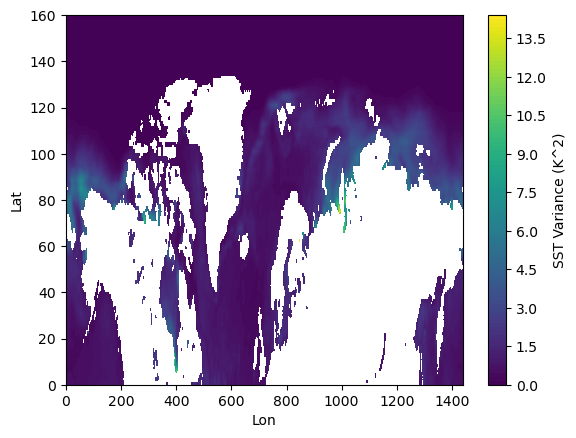

In [51]:
# Now plot varience of SST across the domain e.g. dim='time'
sst_sept_var_domain=sst_september.sst.var(dim=['date']).values
plt.contourf(np.flipud(sst_sept_var_domain), levels=100)
cbar = plt.colorbar()
cbar.set_label('SST Variance (K^2)')
#Add label
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.show()

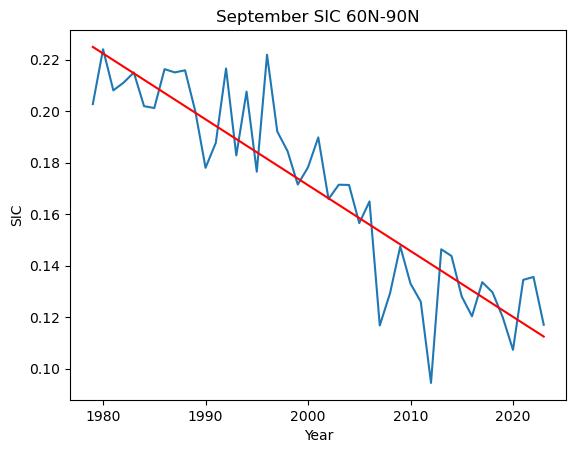

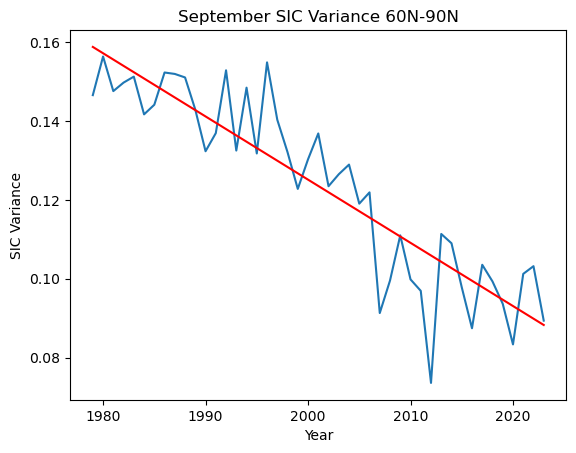

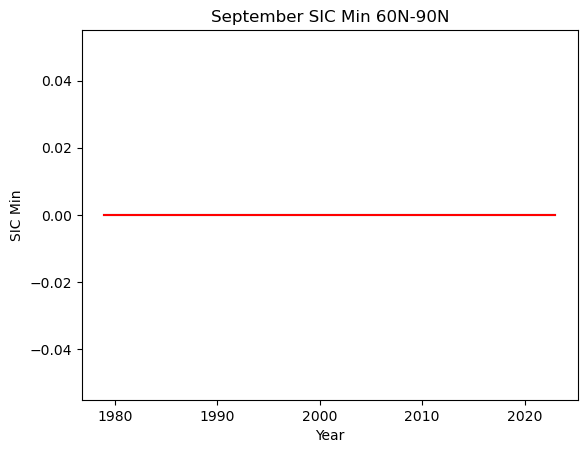

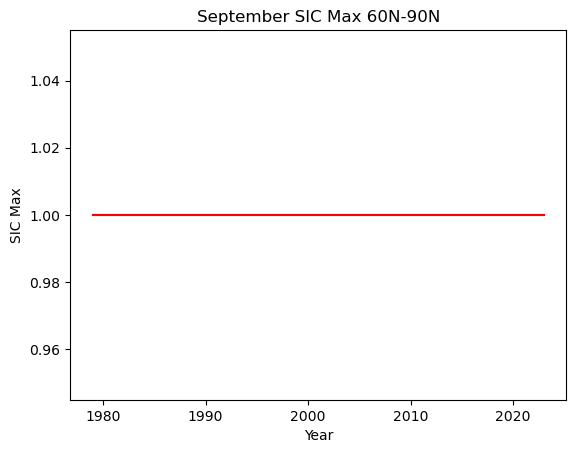

In [56]:
# Monthly mean values in K
sic_monthly_mean = sic.mean(dim=['lat', 'lon'])
sic_monthly_mean.values
plt.plot(np.arange(1979, 2023 + 1, 1), sic_monthly_mean.values)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979, 2023 + 1, 1), sic_monthly_mean.values)
plt.plot(np.arange(1979, 2023 + 1, 1), slope * np.arange(1979, 2023 + 1, 1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SIC')
plt.title('September SIC 60N-90N')
plt.show()
# Calculate the variance of the SIC in this dataset across the domain
sic_sept_var = sic.var(dim=['lat', 'lon']).values
plt.plot(np.arange(1979, 2023 + 1, 1), sic_sept_var)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979, 2023 + 1, 1), sic_sept_var)
plt.plot(np.arange(1979, 2023 + 1, 1), slope * np.arange(1979, 2023 + 1, 1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SIC Variance')
plt.title('September SIC Variance 60N-90N')
plt.show()
# Now plot the minimum SIC values in the dataset over time
sic_sept_min = sic.min(dim=['lat', 'lon']).values
plt.plot(np.arange(1979, 2023 + 1, 1), sic_sept_min)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979, 2023 + 1, 1), sic_sept_min)
plt.plot(np.arange(1979, 2023 + 1, 1), slope * np.arange(1979, 2023 + 1, 1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SIC Min')
plt.title('September SIC Min 60N-90N')
plt.show()

# Now plot the maximum SIC values in the dataset over time
sic_sept_max = sic.max(dim=['lat', 'lon']).values
plt.plot(np.arange(1979, 2023 + 1, 1), sic_sept_max)
# Linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(1979, 2023 + 1, 1), sic_sept_max)
plt.plot(np.arange(1979, 2023 + 1, 1), slope * np.arange(1979, 2023 + 1, 1) + intercept, 'r')
# Plot labels
plt.xlabel('Year')
plt.ylabel('SIC Max')
plt.title('September SIC Max 60N-90N')
plt.show()


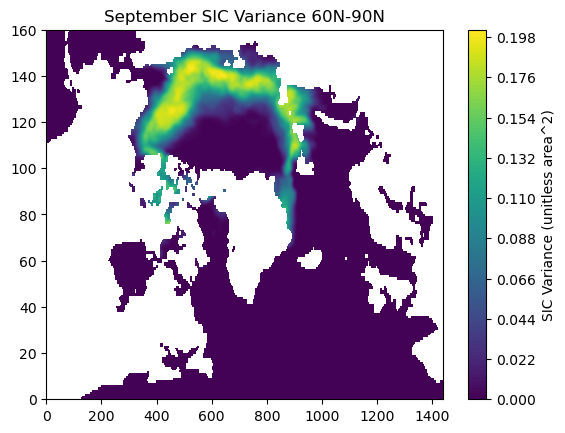

In [57]:
# Now plot variance of SIC across the domain e.g. dim='time'
sic_sept_var_domain = sic.var(dim=['time']).values
plt.contourf(np.flipud(sic_sept_var_domain), levels=100)
cbar = plt.colorbar()
cbar.set_label('SIC Variance (unitless area^2)')
# Add label
#Add title
plt.title('September SIC Variance 60N-90N')
plt.show()

In [88]:
# Define the latitude and longitude ranges for the 5 separate boxes
lat_ranges = [(50, 90)]
lon_ranges = [(-180, -108), (-108, -36), (-36, 36), (36, 108), (108, 180)]

# Initialize a list to store the mean SST values for each box
mean_sst_values = [[],[],[],[],[]]

# Loop through each box and calculate the mean SST
for i in range(5):
    sst_box = sst.isel(latitude=slice(70, 90)).isel(longitude=slice(lon_ranges[i][0], lon_ranges[i][1]))
    mean_sst_box = sst_september.sst.mean(dim=['latitude', 'longitude']).values
    print(mean_sst_box)
    mean_sst_values[i].append(mean_sst_box)

[275.38138 275.26633 275.42996 275.1203  275.30405 275.45334 275.36487
 275.2424  275.33398 275.33215 275.4191  275.59003 275.43924 275.13202
 275.37595 275.3265  275.65234 275.43405 275.66086 275.5888  275.51413
 275.5584  275.6819  275.73624 275.83368 275.7856  275.908   275.90683
 276.26862 275.9635  275.80173 276.12646 276.1336  276.2248  275.88702
 276.0698  275.94827 276.19727 276.1467  276.17218 276.37457 276.5194
 276.16617 276.26224 276.33063]
[275.38138 275.26633 275.42996 275.1203  275.30405 275.45334 275.36487
 275.2424  275.33398 275.33215 275.4191  275.59003 275.43924 275.13202
 275.37595 275.3265  275.65234 275.43405 275.66086 275.5888  275.51413
 275.5584  275.6819  275.73624 275.83368 275.7856  275.908   275.90683
 276.26862 275.9635  275.80173 276.12646 276.1336  276.2248  275.88702
 276.0698  275.94827 276.19727 276.1467  276.17218 276.37457 276.5194
 276.16617 276.26224 276.33063]
[275.38138 275.26633 275.42996 275.1203  275.30405 275.45334 275.36487
 275.2424  275.

In [89]:
# Define the latitude and longitude ranges for the 5 separate boxes
lat_ranges = [(50, 90)]
lon_ranges = [(-180, -108), (-108, -36), (-36, 36), (36, 108), (108, 180)]

# Initialize a list to store the mean SIC values for each box
mean_sic_values = [[],[],[],[],[]]

# Loop through each box and calculate the mean SIC
for i in range(5):
    sic_box = sic.isel(lat=slice(70, 90)).isel(lon=slice(lon_ranges[i][0], lon_ranges[i][1]))
    mean_sic_box = sic.mean(dim=['lat', 'lon']).values
    print(mean_sic_box)
    mean_sic_values[i].append(mean_sic_box)

[0.20276136 0.22403445 0.20808167 0.2110759  0.21501384 0.20193551
 0.20121609 0.21632952 0.21505531 0.21587212 0.19997095 0.17800477
 0.18770496 0.21658749 0.18281401 0.20758868 0.17647709 0.2219269
 0.19209245 0.18449481 0.17149977 0.17820097 0.18980085 0.16587642
 0.17142325 0.1713321  0.15651154 0.16493021 0.11673604 0.12923303
 0.14745828 0.13300839 0.12598294 0.09442824 0.14633659 0.14373087
 0.12798987 0.12032333 0.13356321 0.12962847 0.11994116 0.10727042
 0.13446496 0.13558966 0.11702186]
[0.20276136 0.22403445 0.20808167 0.2110759  0.21501384 0.20193551
 0.20121609 0.21632952 0.21505531 0.21587212 0.19997095 0.17800477
 0.18770496 0.21658749 0.18281401 0.20758868 0.17647709 0.2219269
 0.19209245 0.18449481 0.17149977 0.17820097 0.18980085 0.16587642
 0.17142325 0.1713321  0.15651154 0.16493021 0.11673604 0.12923303
 0.14745828 0.13300839 0.12598294 0.09442824 0.14633659 0.14373087
 0.12798987 0.12032333 0.13356321 0.12962847 0.11994116 0.10727042
 0.13446496 0.13558966 0.1170

In [91]:
mean_sic_values = np.array(mean_sic_values)
mean_sst_values = np.array(mean_sst_values)

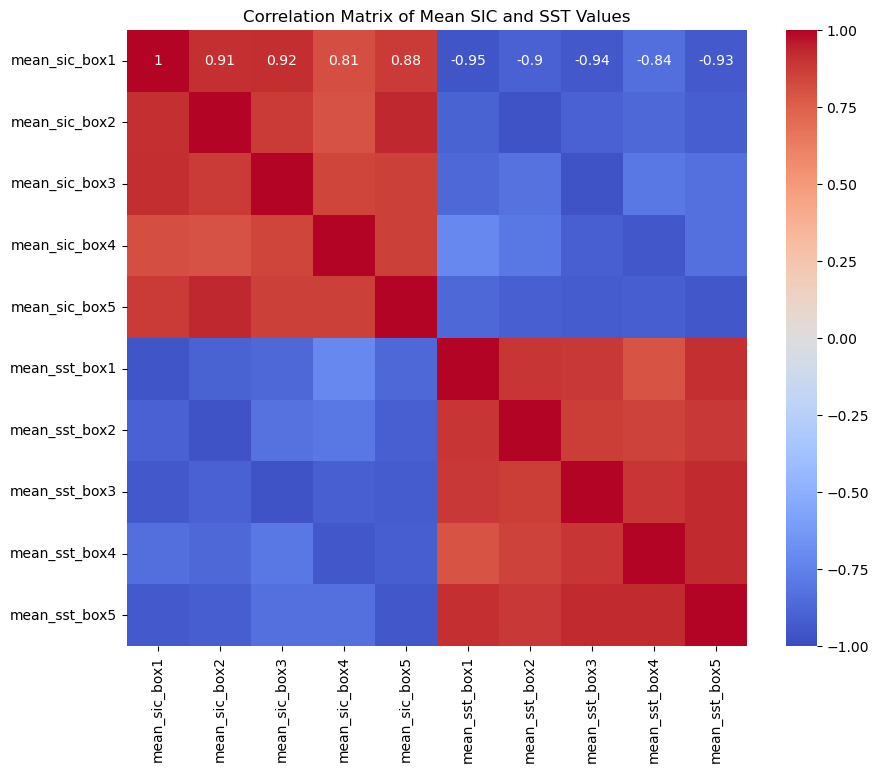

In [92]:
import seaborn as sns
import pandas as pd

# Reshape the arrays to 2D
mean_sic_values = mean_sic_values.reshape(-1, 5)
mean_sst_values = mean_sst_values.reshape(-1, 5)

# Convert the list of mean SIC and SST values to DataFrames
mean_sic_df = pd.DataFrame(mean_sic_values)
mean_sst_df = pd.DataFrame(mean_sst_values)

# Concatenate the DataFrames along the columns
combined_df = pd.concat([mean_sic_df, mean_sst_df], axis=1)
combined_df.columns = ['mean_sic_box1', 'mean_sic_box2', 'mean_sic_box3', 'mean_sic_box4', 'mean_sic_box5',
                       'mean_sst_box1', 'mean_sst_box2', 'mean_sst_box3', 'mean_sst_box4', 'mean_sst_box5']
# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Mean SIC and SST Values')
plt.show()

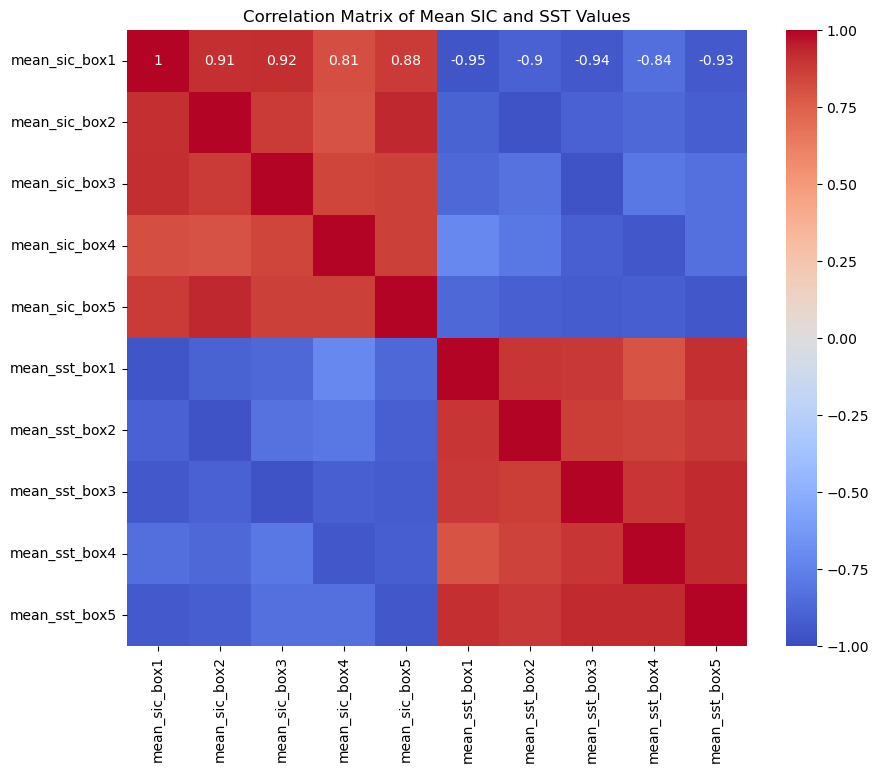

In [93]:
import seaborn as sns

# Lag the SIC and SST values by 1 step
mean_sic_values_lagged = mean_sic_values[:-1]
mean_sst_values_lagged = mean_sst_values[1:]

# Reshape the arrays to 2D
mean_sic_values_lagged = mean_sic_values_lagged.reshape(-1, 5)
mean_sst_values_lagged = mean_sst_values_lagged.reshape(-1, 5)

# Convert the list of mean SIC and SST values to DataFrames
mean_sic_df_lagged = pd.DataFrame(mean_sic_values_lagged)
mean_sst_df_lagged = pd.DataFrame(mean_sst_values_lagged)

# Concatenate the DataFrames along the columns
combined_df_lagged = pd.concat([mean_sic_df_lagged, mean_sst_df_lagged], axis=1)
import pandas as pd

# Reshape the arrays to 2D
mean_sic_values = mean_sic_values.reshape(-1, 5)
mean_sst_values = mean_sst_values.reshape(-1, 5)

# Convert the list of mean SIC and SST values to DataFrames
mean_sic_df = pd.DataFrame(mean_sic_values)
mean_sst_df = pd.DataFrame(mean_sst_values)

# Concatenate the DataFrames along the columns
combined_df = pd.concat([mean_sic_df, mean_sst_df], axis=1)
combined_df.columns = ['mean_sic_box1', 'mean_sic_box2', 'mean_sic_box3', 'mean_sic_box4', 'mean_sic_box5',
                       'mean_sst_box1', 'mean_sst_box2', 'mean_sst_box3', 'mean_sst_box4', 'mean_sst_box5']
# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Mean SIC and SST Values')
plt.show()

### Brief discussion on any patterns or insights observed during the analysis.
This is unfortunate. We have seen strong trends in increasing SST and decreasing SIC over time. Interestingly, although unsurprisingly, variance will not be a huge problem for later sea ice predictions (there is less sea ice to vary). There is also a strong correlation between SST and SIC in a given September, which makes sense. However, more concerningly the correlation between SST and SIC by a year also had a strong correlation even including all the SST across 50N. Had I more time I would have loved to have analyzed a smaller section of the Arctic Ocean with just North Atlantic temps (as they can regulate SST). Having such strong correlation/anticorrelations means we should be careful about reducing our data and choosing specific regions of interest when reducing our data. All in all, this data will be tricky to model due to its large non-linear trends over time.